In [78]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
from scipy.stats import chi2_contingency

# 1. Data Loading, Data Understanding (Initial Analysis), Data Cleaning and Preprocessing
## 1.1 Data Loading

In [79]:
health = pd.read_excel('Healthcare_dataset.xlsx', sheet_name=['Feature Description', 'Dataset'])
health_data_about = health['Feature Description']
health_data = health['Dataset']
pd.set_option('display.max_columns', None)


In [80]:
display(health_data_about)

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


In [81]:
health_data.head()
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

## 1.2. Data Understanding (Initial Analysis)
- Looking at Summary Statistics of the Numerical Values
- Looking at Distribution of Numerical Values 
- Looking at the Numerical Outlier Detection
- Looking at the Number of Unique Values in a Categorical Variable
- Looking at the occurrence of N/A or Unknown values

### Numerical Data Understanding

In [82]:
# Numerical Values Statitstics 
print('Shape of data Rows, Columns:', health_data.shape)
health_data.describe()

Shape of data Rows, Columns: (3424, 69)


,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [83]:
health_data.groupby('Persistency_Flag').agg({'Dexa_Freq_During_Rx': ['mean', 'median', 'std'], 'Count_Of_Risks': ['mean', 'median', 'std']})

Dexa_Freq_During_Rx                   Count_Of_Risks         \
                                mean median        std           mean median   
Persistency_Flag                                                               
Non-Persistent              0.896956    0.0   4.695774       1.169555    1.0   
Persistent                  6.525989    4.0  10.937832       1.355314    1.0   

                            
                       std  
Persistency_Flag            
Non-Persistent    1.068555  
Persistent        1.128150

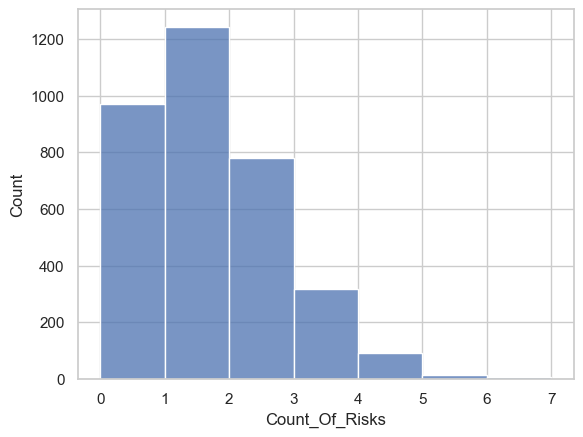

In [84]:
sns.histplot(data=health_data, x='Count_Of_Risks', binwidth=1)
plt.show()

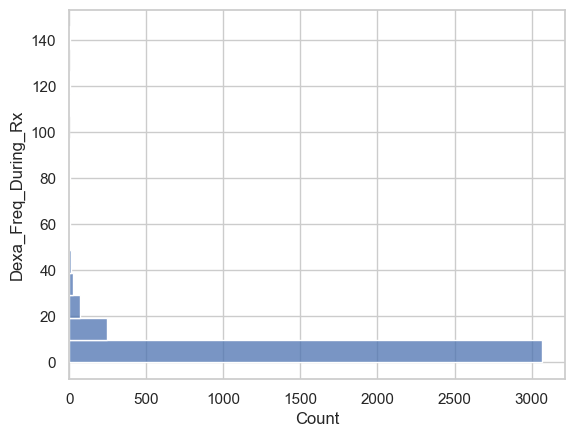

In [85]:
sns.histplot(data=health_data, y='Dexa_Freq_During_Rx', binwidth=10)
plt.show()

<AxesSubplot: xlabel='Count_Of_Risks'>

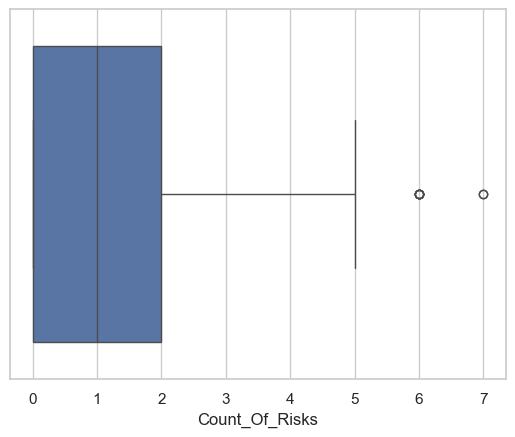

In [86]:
sns.boxplot(data=health_data, x='Count_Of_Risks')

<AxesSubplot: xlabel='Dexa_Freq_During_Rx'>

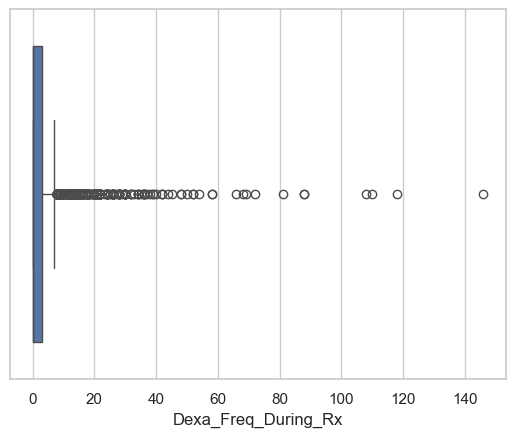

In [87]:
sns.boxplot(data=health_data, x='Dexa_Freq_During_Rx')

Numerical Data Outlier Detection

In [88]:
# Calculation IQR for Dexa_Freq_During_Rx
# 75th Percentile
seventy_fifth_dexa = health_data.Dexa_Freq_During_Rx.quantile(0.75)
# 25th Percentile
twenty_fifth_dexa = health_data.Dexa_Freq_During_Rx.quantile(0.25)
# IQR
iqr_dexa = seventy_fifth_dexa - twenty_fifth_dexa
print('IQR for Dexa_Freq_During_Rx:', iqr_dexa)

#  Calculating the upper and lower limits fo Outlier Detection
upper_dexa = seventy_fifth_dexa + (1.5 * iqr_dexa)
lower_dexa = twenty_fifth_dexa - (1.5 * iqr_dexa)
print('Upper Limit:', upper_dexa, 'Lower Limit:', lower_dexa) 
#  lower_dexa limit isn't possible to be less than zero, thus only upper limit filtering will be considered

outliers = health_data[health_data.Dexa_Freq_During_Rx > upper_dexa]
print('Number of Outlier observations:', outliers.shape[0])

IQR for Dexa_Freq_During_Rx: 3.0
Upper Limit: 7.5 Lower Limit: -4.5
Number of Outlier observations: 460


In [89]:
outliers = health_data[health_data.Dexa_Freq_During_Rx > upper_dexa]
outliers.shape # 460 observations that are above the upper limit

# Find out why Dexa_Freq_During_Rx observations are above the limit - is there any confounding variable that 
# could be constant for these outlier values?

# outliers.Age_Bucket.value_counts()
# health_data.Age_Bucket.value_counts()

# outliers.Ntm_Speciality.value_counts()
# In comparison to the rest of the data is there a difference in practitioner type ?
# when the Dexa_Freq_During_Rx is higher than the upper limit?

(460, 69)

### Catergorical Data Understanding

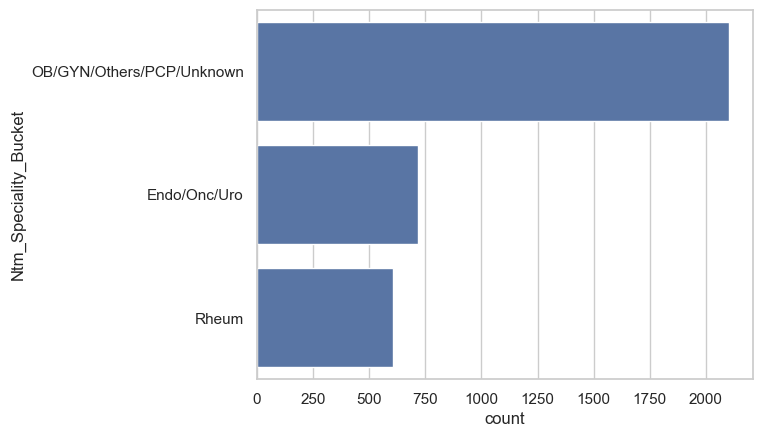

In [90]:
sns.countplot(data=health_data, y='Ntm_Speciality_Bucket')
plt.show()

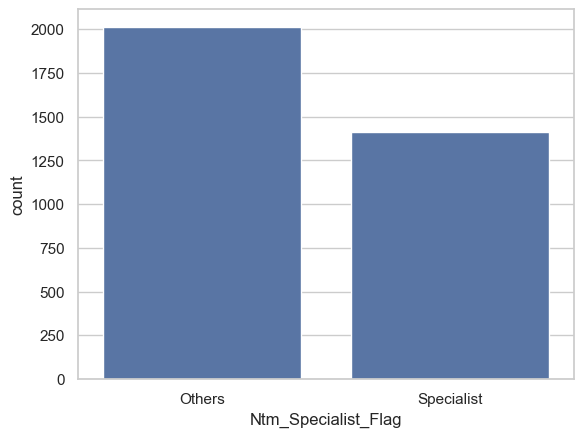

In [91]:
sns.countplot(data=health_data, x='Ntm_Specialist_Flag')
plt.show()

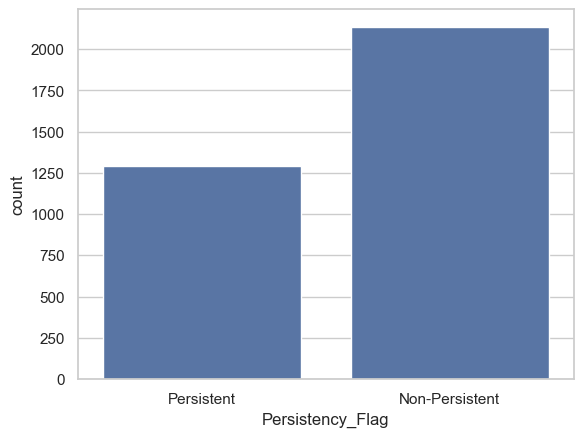

In [92]:
sns.countplot(data=health_data, x='Persistency_Flag')
plt.show()

In [93]:
ethnicity_counts = health_data['Ethnicity'].value_counts()
region_counts = health_data['Region'].value_counts()
age_bucket_counts = health_data['Age_Bucket'].value_counts()
race_counts = health_data['Race'].value_counts()
ntm_speciality_counts = health_data['Ntm_Speciality'].value_counts()
ntm_speciality_flag = health_data['Ntm_Specialist_Flag'].value_counts()
ntm_speciality_bucket = health_data['Ntm_Speciality_Bucket'].value_counts()
change_risk_segment_counts = health_data['Change_Risk_Segment'].value_counts()
change_t_score_counts = health_data['Change_T_Score'].value_counts()

print("Ethnicity Counts:\n", ethnicity_counts)
print("\nRegion Counts:\n", region_counts)
print("\nAge Bucket Counts:\n", age_bucket_counts)
print("\nRace Counts:\n", race_counts)
print("\nNTM Speciality Counts:\n", ntm_speciality_counts)
print("\nNTM Speciality Flag:\n", ntm_speciality_flag)
print("\nNTM Speciality Bucket:\n", ntm_speciality_bucket)
print("\nChange in Risk Segment Counts:\n", change_risk_segment_counts)
print("\nChange in T-Score Counts:\n", change_t_score_counts)

Ethnicity Counts:
 Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64

Region Counts:
 Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64

Age Bucket Counts:
 Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: count, dtype: int64

Race Counts:
 Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64

NTM Speciality Counts:
 Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                          

In [94]:
print("\nNTM Speciality Counts:", ntm_speciality_counts.nunique())


NTM Speciality Counts: 18


In [95]:
# # Identify all categorical columns in the dataset
# categorical_columns = health_data.select_dtypes(include=['object']).columns

# rows = len(categorical_columns) // 2 + len(categorical_columns) % 2
# plt.figure(figsize=(20, 5 * rows))

# for i, column in enumerate(categorical_columns):
#     plt.subplot(rows, 2, i + 1)
#     sns.countplot(y=column, data=health_data, palette='viridis')
#     plt.title(f'Distribution of {column}')
#     plt.tight_layout()

# plt.show()



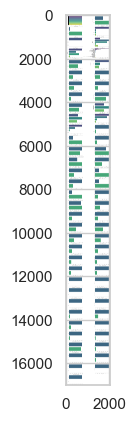

In [96]:
image_path = 'categorical_variables.png'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

### Detection of Missing Values

In [97]:
# Check for missing data in each column
missing_data = health_data.isnull().sum()

# Display the columns with missing data and their counts
missing_data[missing_data > 0]

Series([], dtype: int64)

## 1.3. Data Cleaning and Preprocessing


In [98]:
# Calculate the threshold for 5% of the total observations
threshold = len(health_data) * 0.05
health_data_preprocessed = health_data

In [99]:

# Find out why Dexa_Freq_During_Rx observations are above the limit - is there any confounding variable that 
# could be constant for these outlier values?

# outliers.Age_Bucket.value_counts()
# health_data.Age_Bucket.value_counts()

# outliers.Ntm_Speciality.value_counts()
# In comparison to the rest of the data is there a difference in practitioner type ?
# when the Dexa_Freq_During_Rx is higher than the upper limit?


*Categorical Data Preprocessing - Ntm_Speciality Segmentation*

In [100]:
# Identify specialties representing less than 5% of the total
below_threshold = health_data_preprocessed.Ntm_Speciality.value_counts()[health_data_preprocessed.Ntm_Speciality.value_counts() < threshold]
below_threshold.index

Index(['OBSTETRICS AND GYNECOLOGY', 'UROLOGY', 'ORTHOPEDIC SURGERY',
       'CARDIOLOGY', 'PATHOLOGY', 'HEMATOLOGY & ONCOLOGY', 'OTOLARYNGOLOGY',
       'PEDIATRICS', 'PHYSICAL MEDICINE AND REHABILITATION',
       'PULMONARY MEDICINE', 'SURGERY AND SURGICAL SPECIALTIES',
       'PSYCHIATRY AND NEUROLOGY', 'NEPHROLOGY', 'ORTHOPEDICS',
       'PLASTIC SURGERY', 'VASCULAR SURGERY',
       'HOSPICE AND PALLIATIVE MEDICINE', 'GERIATRIC MEDICINE',
       'GASTROENTEROLOGY', 'TRANSPLANT SURGERY', 'CLINICAL NURSE SPECIALIST',
       'OCCUPATIONAL MEDICINE', 'HOSPITAL MEDICINE', 'OPHTHALMOLOGY',
       'PODIATRY', 'EMERGENCY MEDICINE', 'RADIOLOGY',
       'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY',
       'NEUROLOGY', 'PAIN MEDICINE', 'NUCLEAR MEDICINE'],
      dtype='object', name='Ntm_Speciality')

In [101]:
# Replace these specialties with 'Other'
health_data_preprocessed['Ntm_Speciality_Restructured'] = health_data_preprocessed['Ntm_Speciality'].apply(lambda x: 'Other' if x in below_threshold.index else x)
health_data_preprocessed['Ntm_Speciality_Restructured'].value_counts()


Ntm_Speciality_Restructured
GENERAL PRACTITIONER    1535
RHEUMATOLOGY             604
ENDOCRINOLOGY            458
Unknown                  310
Other                    292
ONCOLOGY                 225
Name: count, dtype: int64

*Categorical Data Preprocessing - Removal of Unknown/Other values under 5% of total values*

In [102]:
# Identify all categorical columns in the dataset
categorical_columns = health_data_preprocessed.select_dtypes(include=['object']).columns

In [103]:
# Assuming health_data is your DataFrame
for column in categorical_columns:
    # Check if the column contains 'Unknown', 'unknown', 'Other', or 'other'
    contains_unknown = health_data_preprocessed[column].str.contains('Unknown|unknown|Other|other', na=False)
    
    # Count the number of 'Unknown' values
    unknown_count = contains_unknown.sum()
    
    # If the count of 'Unknown' values is less than the threshold AND not equal to 0
    if (unknown_count < threshold) & (unknown_count != 0):
        print('Below Threshold:')
        print(f"Column: {column}, Unknown Count: {unknown_count}")
        # Using 'contains_unknown' to filter out rows where the current column contains 'Unknown', etc.
        # The '~' operator inverts the boolean series to keep rows NOT containing 'Unknown', etc.
        health_data_preprocessed = health_data_preprocessed[~contains_unknown]
    elif (unknown_count > threshold):
        print('Above Threshold:')
        print(f"Column: {column}, Unknown Count: {unknown_count}")
        


Below Threshold:
Column: Race, Unknown Count: 97
Below Threshold:
Column: Ethnicity, Unknown Count: 68
Below Threshold:
Column: Region, Unknown Count: 57
Above Threshold:
Column: Ntm_Speciality, Unknown Count: 290
Above Threshold:
Column: Ntm_Specialist_Flag, Unknown Count: 1890
Above Threshold:
Column: Ntm_Speciality_Bucket, Unknown Count: 1973
Above Threshold:
Column: Risk_Segment_During_Rx, Unknown Count: 1393
Above Threshold:
Column: Tscore_Bucket_During_Rx, Unknown Count: 1393
Above Threshold:
Column: Change_T_Score, Unknown Count: 1393
Above Threshold:
Column: Change_Risk_Segment, Unknown Count: 2079
Above Threshold:
Column: Ntm_Speciality_Restructured, Unknown Count: 563


In [104]:
print(health_data.shape)
print(health_data_preprocessed.shape)

(3424, 70)
(3202, 70)


In [105]:
display(health_data_preprocessed)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Restructured
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,GENERAL PRACTITIONER
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,GENERAL PRACTITIONER
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,GENERAL PRACTITIONER
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,GENERAL PRACTITIONER
5,P6,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,2,GENERAL PRACTITIONER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,Y,Y,Y,N,Y,Y,N,N,N,Y,N,Y,Y,N,N,

In [106]:
health_data_preprocessed.drop(['Ntm_Speciality_Bucket', 'Ptid'], inplace=True, axis=1)

In [107]:
health_data_preprocessed.to_csv('health_data_preprocessed.csv', index=False)

In [108]:
display(health_data_preprocessed)

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Restructured
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,GENERAL PRACTITIONER
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,GENERAL PRACTITIONER
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,GENERAL PRACTITIONER
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1,GENERAL PRACTITIONER
5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,N,N,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,2,GENERAL PRACTITIONER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,Y,Y,Y,N,Y,Y,N,N,N,Y,N,Y,Y,N,N,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,1,GENERAL PRACTITIONER
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,N,N,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,

# 2. Exploratory Data Analysis


### Numerical vs Numerical

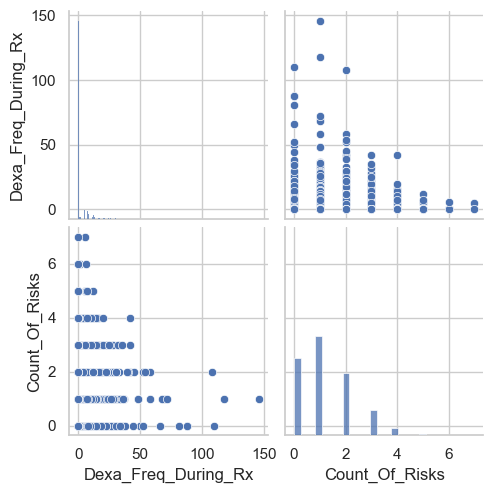

In [109]:
sns.pairplot(data=health_data_preprocessed)

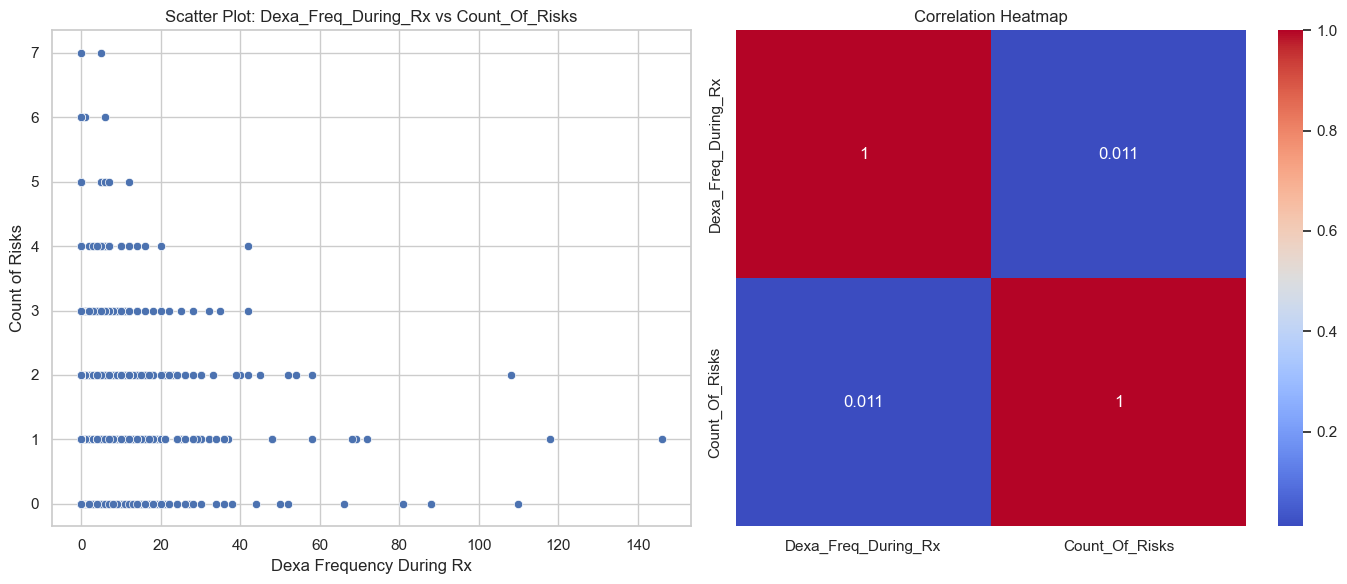

In [110]:
# Create a figure to hold the plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for the numerical variables
sns.scatterplot(x='Dexa_Freq_During_Rx', y='Count_Of_Risks', data=health_data_preprocessed, ax=ax[0])
ax[0].set_title('Scatter Plot: Dexa_Freq_During_Rx vs Count_Of_Risks')
ax[0].set_xlabel('Dexa Frequency During Rx')
ax[0].set_ylabel('Count of Risks')

# Correlation heatmap for the numerical variables
correlation_matrix = health_data_preprocessed[['Dexa_Freq_During_Rx', 'Count_Of_Risks']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()


### Numerical vs Categorical 

<AxesSubplot: xlabel='Persistency_Flag', ylabel='Dexa_Freq_During_Rx'>

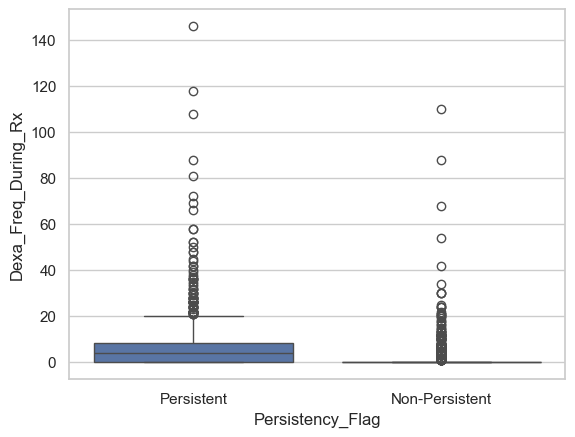

In [111]:
sns.boxplot(data=health_data_preprocessed, x='Persistency_Flag', y='Dexa_Freq_During_Rx')

<AxesSubplot: xlabel='Count_Of_Risks', ylabel='Count'>

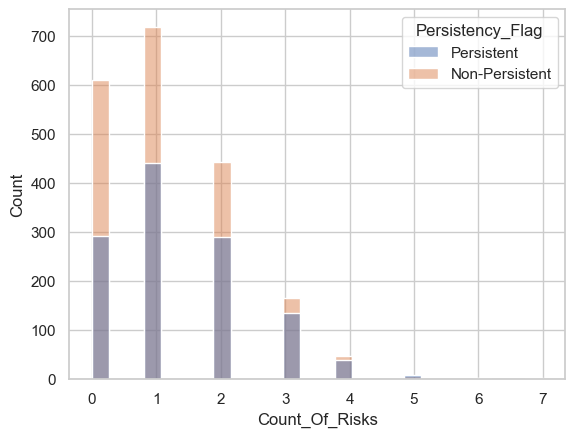

In [112]:
sns.histplot(data=health_data_preprocessed, x='Count_Of_Risks', hue='Persistency_Flag')

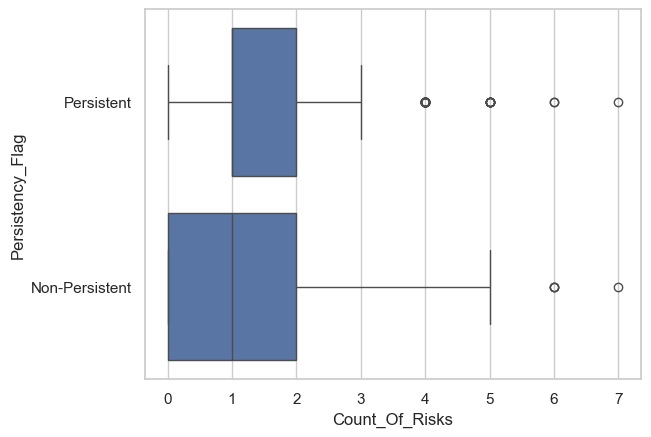

In [113]:
# sns.boxplot(data=health_data, x='Count_Of_Risks', y='Dexa_Freq_During_Rx')
sns.boxplot(data=health_data_preprocessed, x='Count_Of_Risks', y='Persistency_Flag')
plt.show()

### Categorical vs Categorical


In [114]:
# Identify all categorical variables except 'Persistency_Flag'
categorical_variables_no_pf = [col for col in health_data_preprocessed.columns if health_data_preprocessed[col].dtype == 'object' and col != 'Persistency_Flag']

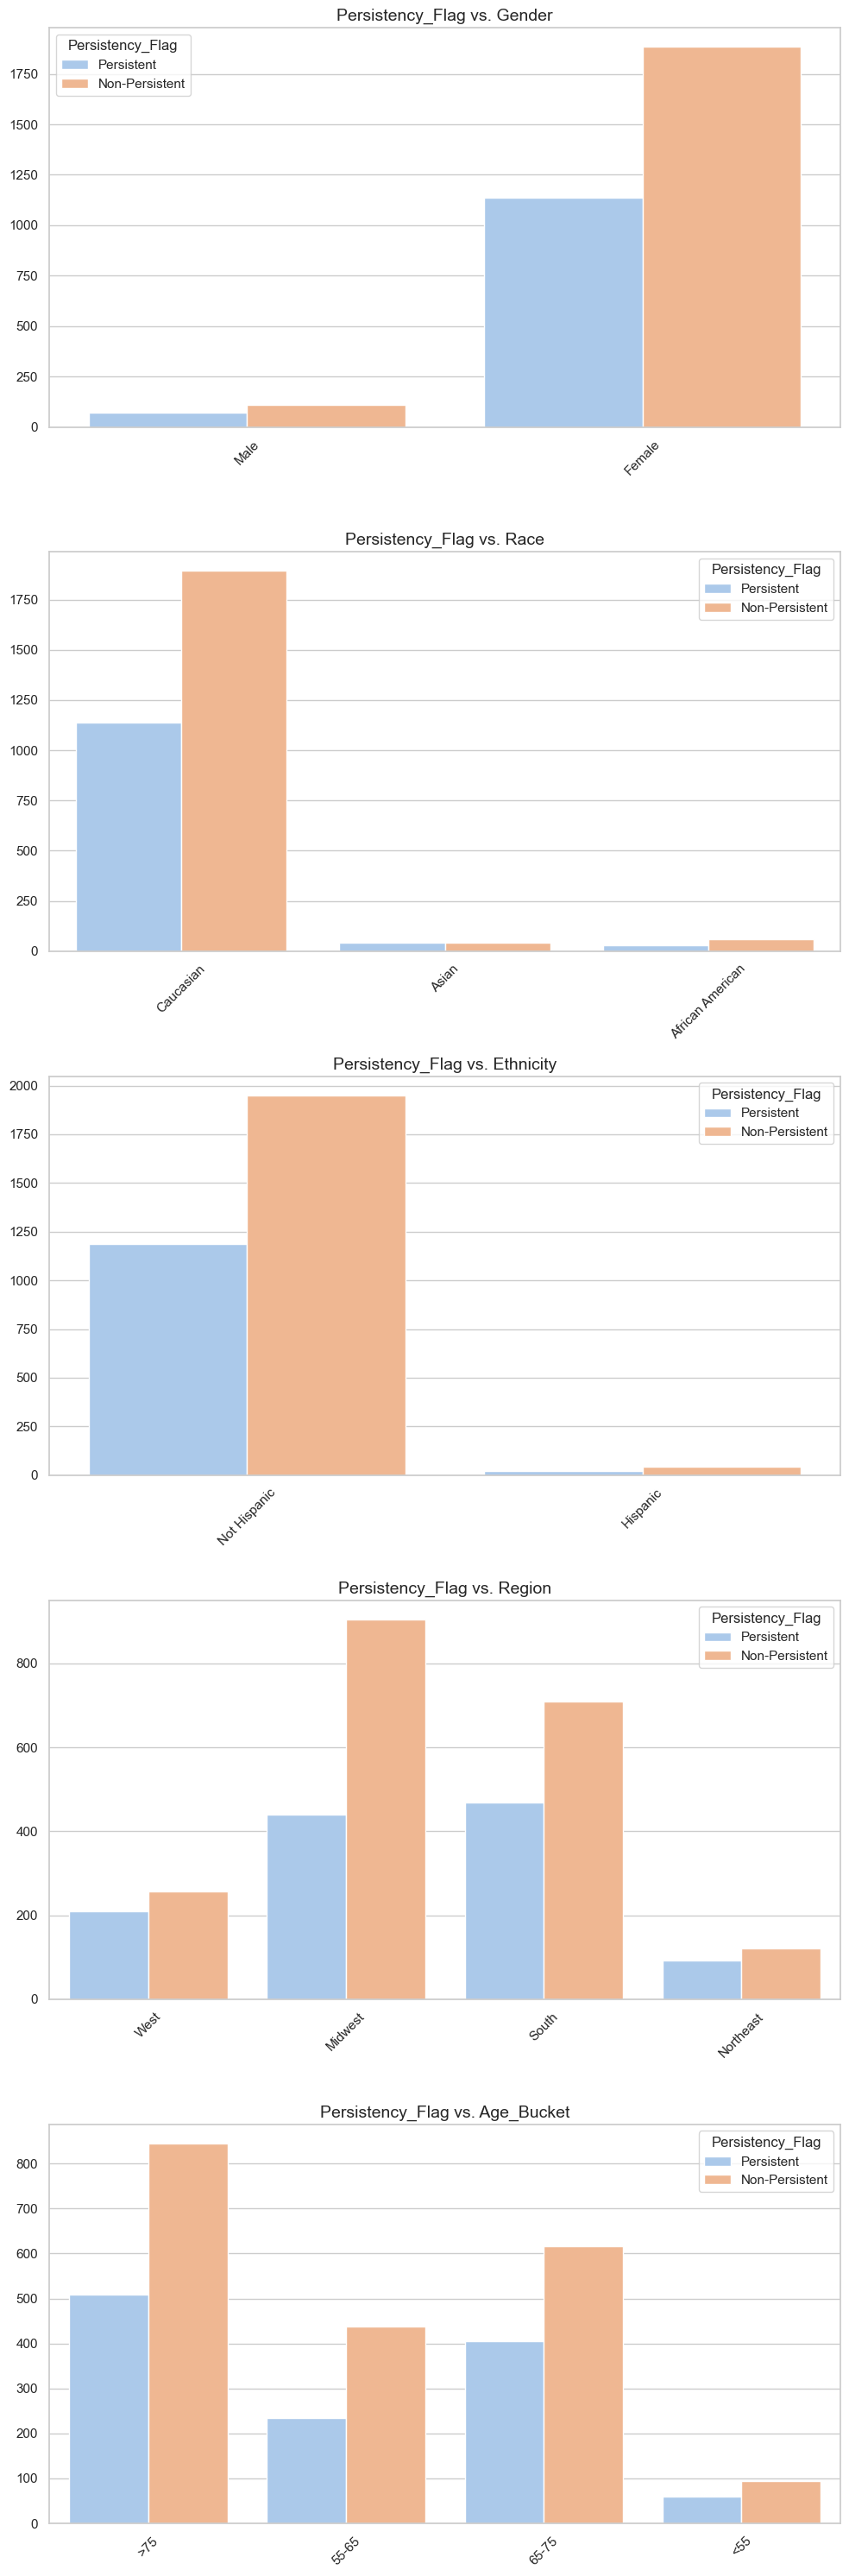

In [120]:

max_variables_to_visualize = 5
selected_variables = categorical_variables_no_pf[:max_variables_to_visualize]

# Plot the relationship between 'Persistency_Flag' and selected categorical variables
fig, axes = plt.subplots(nrows=len(selected_variables), ncols=1, figsize=(10, 30))

for i, var in enumerate(selected_variables):
    sns.countplot(x=var, hue='Persistency_Flag', data=health_data_preprocessed, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Persistency_Flag vs. {var}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


- Differences in Persistency across categories like Gender, Race, and Ethnicity suggest that demographic factors could influence treatment adherence.
- Regional Variations and differences by Age_Bucket might reflect geographical and age-related factors affecting persistency.
- Specialty and Risk Factors: The relationship between Persistency_Flag and variables related to medical specialty or risk factors (if included in the subset) could highlight the importance of medical care context and patient health profiles.

In [ ]:
categorical_columns = health_data_preprocessed.select_dtypes(include=['object']).columns

Index(['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       

In [ ]:
# Function to perform chi-squared test and return the p-value
def chi_squared_test(data, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    _, p, _, _ = chi2_contingency(contingency_table)
    return p

# Function to plot stacked bar chart
def plot_stacked_bar_chart(data, col1, col2, ax):
    crosstab = pd.crosstab(data[col1], data[col2], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Percentage')
    ax.set_title(f'{col1} vs {col2}')

# Prepare the figure for plotting
n_vars = len(categorical_columns)
n_rows = (n_vars + 1) // 2  # Aim for a roughly square layout, with two columns
fig, axes = plt.subplots(n_rows, 2, figsize=(30, 10*n_rows))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Selected variable pairs
variable_pairs = [('Persistency_Flag', var) for var in categorical_variables_no_pf.to_list()]

p_string = []
p_values = []
# Perform analysis and plot for each pair
for pair, ax in zip(variable_pairs, axes.flatten()):
    p_value = chi_squared_test(health_data_preprocessed, *pair)
    plot_stacked_bar_chart(health_data_preprocessed, *pair, ax)
    ax.set_title(f'{pair[0]} vs {pair[1]} (p-value: {p_value:.4f})')
    p_string.append(f'{pair[1]}')
    p_values.append(p_value)


p_values_df = pd.DataFrame({
    'Comparison against Persistency_Flag': p_string,
    'P_Value': p_values
})

plt.show()

Chi-squared tests of independence between Persistency_Flag and various other categorical variables, with the p-values indicating the significance of the associations

- Lowest P-values: These would indicate the strongest evidence of an association with Persistency_Flag.
- High Bar Separation: In a stacked bar chart, significant differences in the proportion of categories between the two levels of Persistency_Flag suggest a strong relationship.
- Consistency across Categories: If every level of a categorical variable has similar proportions regarding Persistency_Flag, the relationship might be less meaningful for prediction.

In [ ]:
p_values_df.sort_values('P_Value', ascending=True, inplace=True) 
p_values_df[p_values_df.P_Value < 0.05]


,Comparison against Persistency_Flag,P_Value
0,Persistency_Flag,0.000000e+00
10,Dexa_During_Rx,1.130748e-172
28,Comorb_Long_Term_Current_Drug_Therapy,7.012163e-91
23,Comorb_Encounter_For_Immunization,2.250979e-72
22,Comorb_Encounter_For_Screening_For_Malignant_N...,6.952994e-72
24,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_...",2.779927e-59
31,Comorb_Other_Disorders_Of_Bone_Density_And_Str...,5.088962e-46
38,Concom_Systemic_Corticosteroids_Plain,3.034717e-43
26,Comorb_Other_Joint_Disorder_Not_Elsewhere_Clas...,1.184227e-39
44,Concom_Anaesthetics_General,1.346314e-37
